# **Análisis de las variables que determinan los precios de las viviendas en EE.UU** 🏡

Se tiene una base de datos con 1460 filas y 81 columnas, en donde se relaciona variada información sobre casas vendidas o en venta en Estados Unidos. El precio, el área de la casa, el tamaño del garage, el año de construcción son algunas de estas variables, sumadas a otras 77.

La pregunta motivadora para este análisis es: ¿Cuál es o cuáles son las variables que más inciden en el precio final de una casa en Estados Unidos?

**Objetivo del análisis:** Identificar las variables con mayor incidencia en la determinación del precio de venta de las viviendas en EEUU.

**Hipótesis inicial**: La variable "Area del lote" es la que tiene mayor peso a la hora de determinar el precio de venta de una vivienda. Es decir, a mayor metraje de lote, mayor será el valor de venta.  


A continuación, aplicaremos algunas funciones de la libreria PANDAS que nos permita obetener información relavante para comprobar o no la hipotesis.

## 1. Tratamiento inicial de la base de datos 📋

Se cargó la base de datos, haciendo uso de la libreria pandas y se realizó una exploración visual en la que se lograron identificar las columnas que, a criterio del equipo son irrelevantes para el desarrollo del análisis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('insumos/pricehouses.csv') 

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Eliminación de columnas irrelevantes

In [4]:
columnas_a_eliminar= ['Utilities','LandContour','LotShape','Alley','SaleType','MiscVal','MiscFeature','ScreenPorch','LandSlope']
df= df.drop(columns=columnas_a_eliminar) #Se eliminan las columnas y se sobreescribe el DataFrame
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotConfig,Neighborhood,Condition1,Condition2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolArea,PoolQC,Fence,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Inside,CollgCr,Norm,Norm,...,61,0,0,0,NaN,NaN,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Pave,FR2,Veenker,Feedr,Norm,...,0,0,0,0,NaN,NaN,5,2007,Normal,181500
2,3,60,RL,68.0,11250,Pave,Inside,CollgCr,Norm,Norm,...,42,0,0,0,NaN,NaN,9,2008,Normal,223500
3,4,70,RL,60.0,9550,Pave,Corner,Crawfor,Norm,Norm,...,35,272,0,0,NaN,NaN,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,FR2,NoRidge,Norm,Norm,...,84,0,0,0,NaN,NaN,12,2008,Normal,250000


## 2. Identificación y eliminación de datos nulos ('NaN') ❌

Producto de la revisión general realizada en el punto 1, se identificaron columnas con un número considerable de valores nulos o vacios, por lo tanto se procedió a contabilizarlos y se les dió tratamiento mediante las siguientes herramientas:

In [5]:
#Identificación de columnas con datos nulos

df.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
Fence             True
MoSold           False
YrSold           False
SaleCondition    False
SalePrice        False
Length: 72, dtype: bool

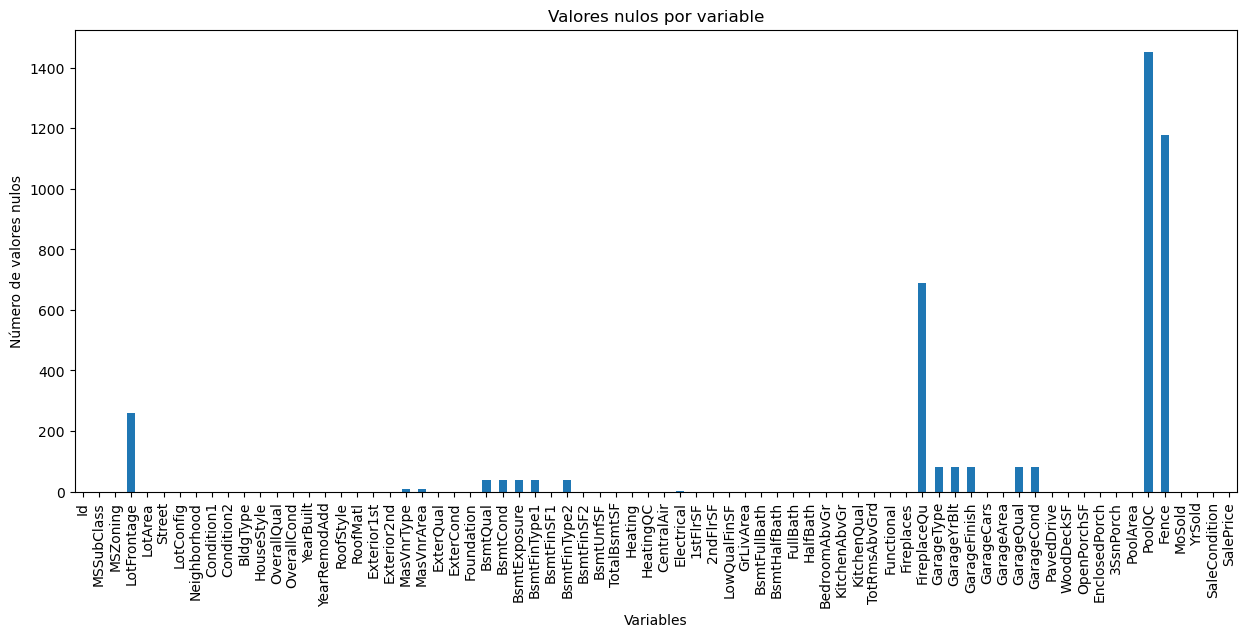

In [6]:
#Se grafica para observar las proporciones de los valores nulos

ax = df.isnull().sum().plot(kind='bar', figsize=(15, 6))

#Se fija el título del gráfico y los nombres de los ejes

ax.set_xlabel('Variables')
ax.set_ylabel('Número de valores nulos')
ax.set_title('Valores nulos por variable')

# Se muestra la gráfica
plt.show()

**Nota:** A consideración del equipo de trabajo se estableció el valor **200** como el límite aceptable de datos nulos ('NaN') por columna.

Del gráfico anterior se puede deducir lo siguiente:

- Las columnas con mayor cantidad de datos nulos (>200) son **PoolQC, Fence, FirePlaceQu, LotFrontage**. Se consideran irrelevantes para el análisis y se eliminan.


- Las columnas **MasVnrType, MasVnrType, BsmtQual, BsmtCond, BsmtFinType1, BsmtFinType2, Garagetype, GarageYrBlt, GarageFinish, GarageQual, GarageCond** contienen valores nulos pero en menor cantidad y pueden contener información relevante para el análisis, por ende no se eliminan sino que se hace un llenado de datos con el siguiente criterio: Para las variables numéricas se aplica un llenado con la media, para las variables tipo objeto se procede a llenar con el valor que más se repite, es decir, la moda.


In [7]:
columnas_nulas = ['PoolQC',  'Fence', 'FireplaceQu'] #Columnas despreciables

df= df.drop(columns=columnas_nulas) #Se eliminan y se sobreescribe el dataframe

Se decide llenar los valores faltantes de las columnas que aún tienen valores nulos, pero para eso es necesario conocer el tipo de datos para definir el método de reemplazo de los valores

In [8]:
columnas_con_nulos = df.columns[df.isnull().any()] 

#los métodos .isnull().any() permiten consultar las variables que conservan valores nulos
#Estos se utilizan como filtro

In [9]:
df[columnas_con_nulos].dtypes #Se identifican los tipos de datos

LotFrontage     float64
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object

Posteriormente se procede con el cálculo de los valores que tomaran el lugar de los nulos para cada tipo de datos: La media para las variables numéricas y la moda para las variables tipo objeto.

In [10]:
medias = df.select_dtypes(include=['number']).mean()
modas = df.select_dtypes(include=['object']).mode().iloc[0] #Con el método .mode() obtenemos un dataframe con una fila
                                                            #El .iloc[0] nos permite extraer dicha fila    

In [11]:
#Se utiliza el método .fillna() pasándole un diccionario en el cual se relacionan los campos a llenar y el valor correspondiente

df.fillna(value={
    'LotFrontage': medias['LotFrontage'],
    'MasVnrArea': medias['MasVnrArea'],
    'GarageYrBlt': medias['GarageYrBlt'],
    'MasVnrType': modas['MasVnrType'],
    'BsmtQual': modas['BsmtQual'],
    'BsmtCond': modas['BsmtCond'],
    'BsmtExposure': modas['BsmtExposure'],
    'BsmtFinType1': modas['BsmtFinType1'],
    'BsmtFinType2': modas['BsmtFinType2'],
    'Electrical': modas['Electrical'],
    'GarageType': modas['GarageType'],
    'GarageFinish': modas['GarageFinish'],
    'GarageQual': modas['GarageQual'],
    'GarageCond': modas['GarageCond']}, inplace = True)

Finalmente se verificó que los procesos anteriores hayan sido aplicados correctamente:

In [12]:
df.isnull().any() #Se verifica que no queden valores nulos

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
                 ...  
PoolArea         False
MoSold           False
YrSold           False
SaleCondition    False
SalePrice        False
Length: 69, dtype: bool

# 3. Análisis exploratorio 🖊
Posterior a la depuración de la base de datos se utilizó la función `.describe() :` con el objetivo de conocer la estadistica descriptiva.

A partir de las columnas **'LotArea'** y **'SalePrice'** se establecieron categorias como "*Lote grande, mediano y pequeño*" y "*precio alto, bajo o medio*" de acuerdo a un rango de valores seleccionados a partir del conteo de la frecuencia de repetición de los mismos. Esto, haciendo uso de las funciones `value_counts()` y `.cut()`

In [13]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolArea,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,2.758904,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,40.177307,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,738.000000,12.000000,2010.000000,755000.000000


In [14]:
# Identificando los valores de area que más se repiten
Area_lote_comun = df['LotArea'].value_counts().head(3)
Precios = df['SalePrice'].value_counts().head(3)

In [15]:
Area_lote_comun

7200    25
9600    24
6000    17
Name: LotArea, dtype: int64

In [16]:
Precios

140000    20
135000    17
155000    14
Name: SalePrice, dtype: int64

In [17]:
def generar_columna_tamano_lote(valor):
    grupos = [0, 7100, 9500, float('inf')]
    nombres = ['Lote_pequeño', 'Lote_mediano', 'Lote_grande']
    return pd.cut(valor, bins=3, labels=nombres, right=False)

def generar_columna_clasif_valor(valor):
    grupos = [0, 135000, 155000, float('inf')]
    nombres = ['Bajo', 'Medio', 'Alto']
    return pd.cut(valor, bins=grupos, labels=nombres, right=True)

# Aplicar las funciones para crear las nuevas columnas
df['Tamaño_lote'] = generar_columna_tamano_lote(df['LotArea'])
df['Clasif_valor'] = generar_columna_clasif_valor(df['SalePrice'])
df['Tamaño_lote'].value_counts()

Lote_pequeño    1456
Lote_grande        3
Lote_mediano       1
Name: Tamaño_lote, dtype: int64

## 3.1. Análisis gráfico ❄

Apartir de las categorias creadas previamente y haciendo uso de la función `countplot()` de la libreria **Seaborn** se generaron gráficos de barras para observar el comportamiento de la variable precio y area de lote, de acuerdo con el conteo de registros de la base de datos y la hipotesis planteada inicialmente. Obteniendo los siguientes resultados:


> - Para el grupo creado con la variable **'Clasif_Valor'** se identificó que la mayor proporción de casas se encuentra en el rango de precio 'alto'

<Axes: xlabel='Clasif_valor', ylabel='count'>

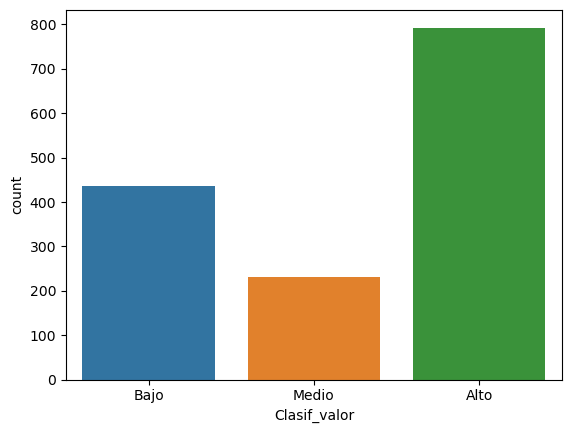

In [18]:
sns.countplot(df, x = 'Clasif_valor')

Para el grupo creado con la variable **'Tamaño_Lote'** se identificó que el 100% de proporción de casas se encuentra en el rango establecido para la categoría 'Lote pequeño':


<Axes: xlabel='Tamaño_lote', ylabel='count'>

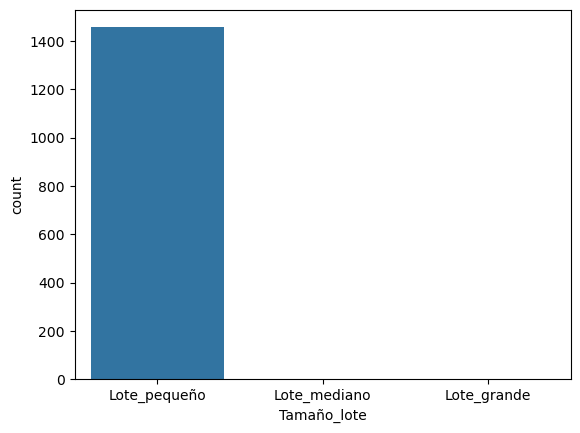

In [19]:
sns.countplot(df, x = 'Tamaño_lote')

### Distribución del precio

Se generó un histograma con el fin de identificar la distribución de los precios de las casas de acuerdo a la cantidad de registros.

Se identifica una distribución con media y valores ubicadas en un rango medio-bajo de precio pero con sesgo a la derecha, es decir, valores altos que se alejan considerablemente del promedio.

In [20]:
df['SalePrice'].quantile(q=0.20)

124000.0

<Axes: xlabel='SalePrice', ylabel='Count'>

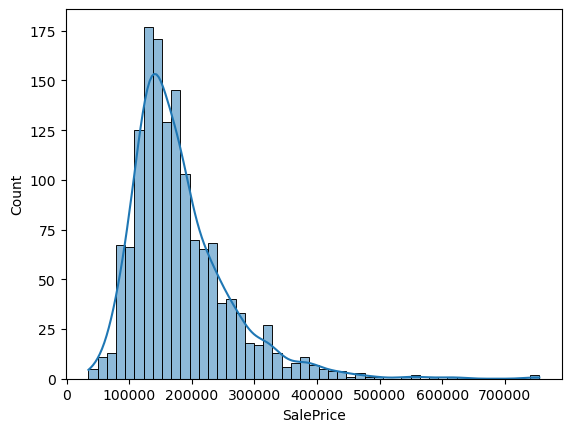

In [21]:
sns.histplot(df['SalePrice'], kde = True)

Seguido del análisis de la distribución. Se decide definir un límite superior y un límite inferior, con el fin de acotar el histograma anterior.

Para elegir este rango de datos se utilizó la función `.quantile()`obteniendo los valores que se encuentran en los percentiles que representan el 5% y 90% de la distribución, así:

(88000.0, 278000.0)

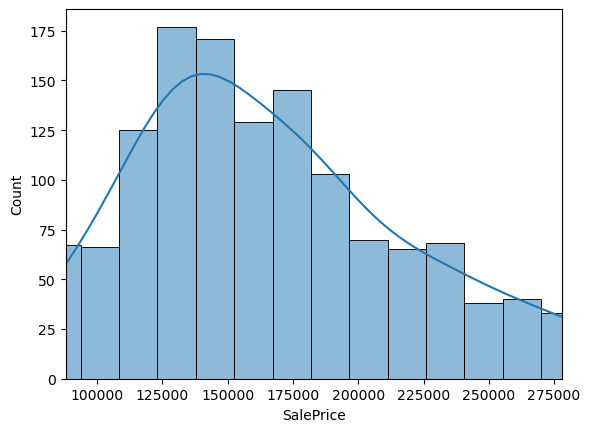

In [22]:
# Se acota el histograma de acuerdo a nuestros valores de interés
limite_inferior = df['SalePrice'].quantile(q = 0.05)
limite_superior = df['SalePrice'].quantile(q = 0.90)

sns.histplot(df['SalePrice'], kde=True)
plt.xlim(limite_inferior, limite_superior)

### Análisis de Correlación

Con el fin de identificar directamente aquellas variables que se correlacionan directamente con el precio, se procede a graficar la matriz de correlación.

Mediante el metodo df.corr() se definió y generó una matriz de correlación de las variables que definen las columnas de la base de datos, con el fin de establecer cuales están altamente correlacionadas, en este caso con el precio de venta.

De este ejercicio se puede inferir:

* La variable la variable calidad general ('OverallQual') aumenta en igual proporcion que el precio de venta ('SalePrice'). Se podría inferir que a mayor calidad, precio de venta más alto. Sin embargo, no son co-dependientes.

* Se identifica que las variables area de parrilla, total de sotanos, Primer piso, carros por garage y area de garaje también aumentan en igual proporción al precio de venta sin superar la calidad general.

* La variable area de lote no tiene un aumento significativo en proporción al precio.



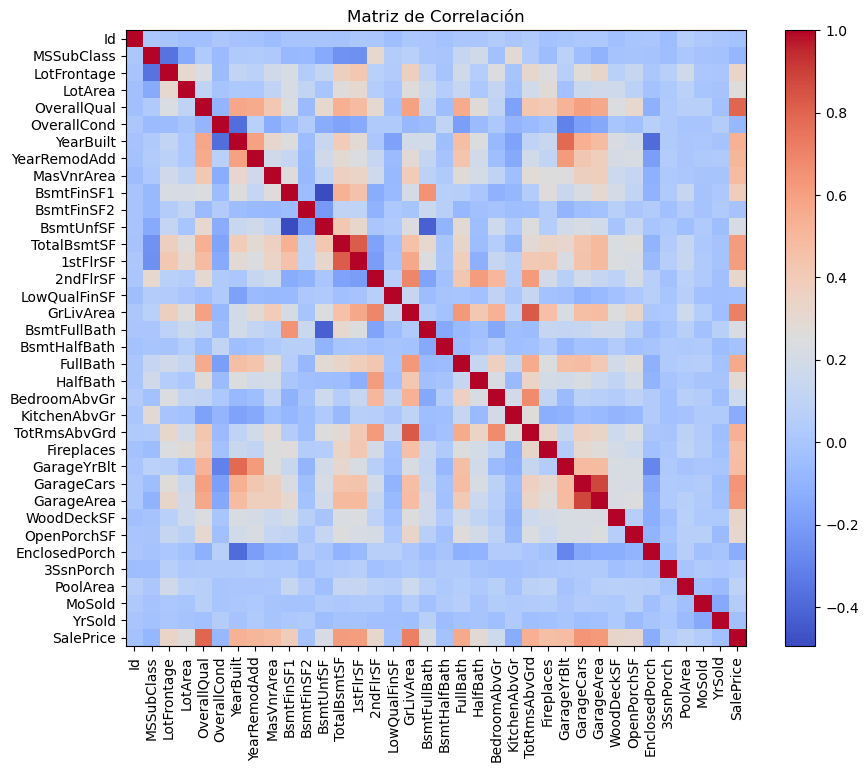

In [23]:
correlacion = df.corr(numeric_only = True) #Se seleccionan únicamente las variables numéricas
plt.figure(figsize=(10,8))

plt.imshow(correlacion, cmap='coolwarm', interpolation='none', aspect='auto') #Se le da estilo al gráfico

plt.xticks(range(len(correlacion)), correlacion.columns, rotation='vertical') #Se fijan las etiquetas del eje X y se rotan
plt.yticks(range(len(correlacion)), correlacion.columns) #Se fijan las etiquetas del eje Y

plt.colorbar()
plt.title('Matriz de Correlación')
plt.show()

Dada la cantidad de variables, se hace complejo identificar las variables principales en la matriz de correlación.

Para solucionar esto existe el método .nlargest() que permite seleccionar las N variables con mayor coeficiente de correlación.

In [24]:
k = 10 #Se seleccionan 10 variables
cols = correlacion.nlargest(k, 'SalePrice')['SalePrice'].index #El atributo .nlargest nos trae las 10 variables con mayor índice de correlación
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

Esta relación también se puede observar gráficamente con el método .pairplot() de la librería seaborn.

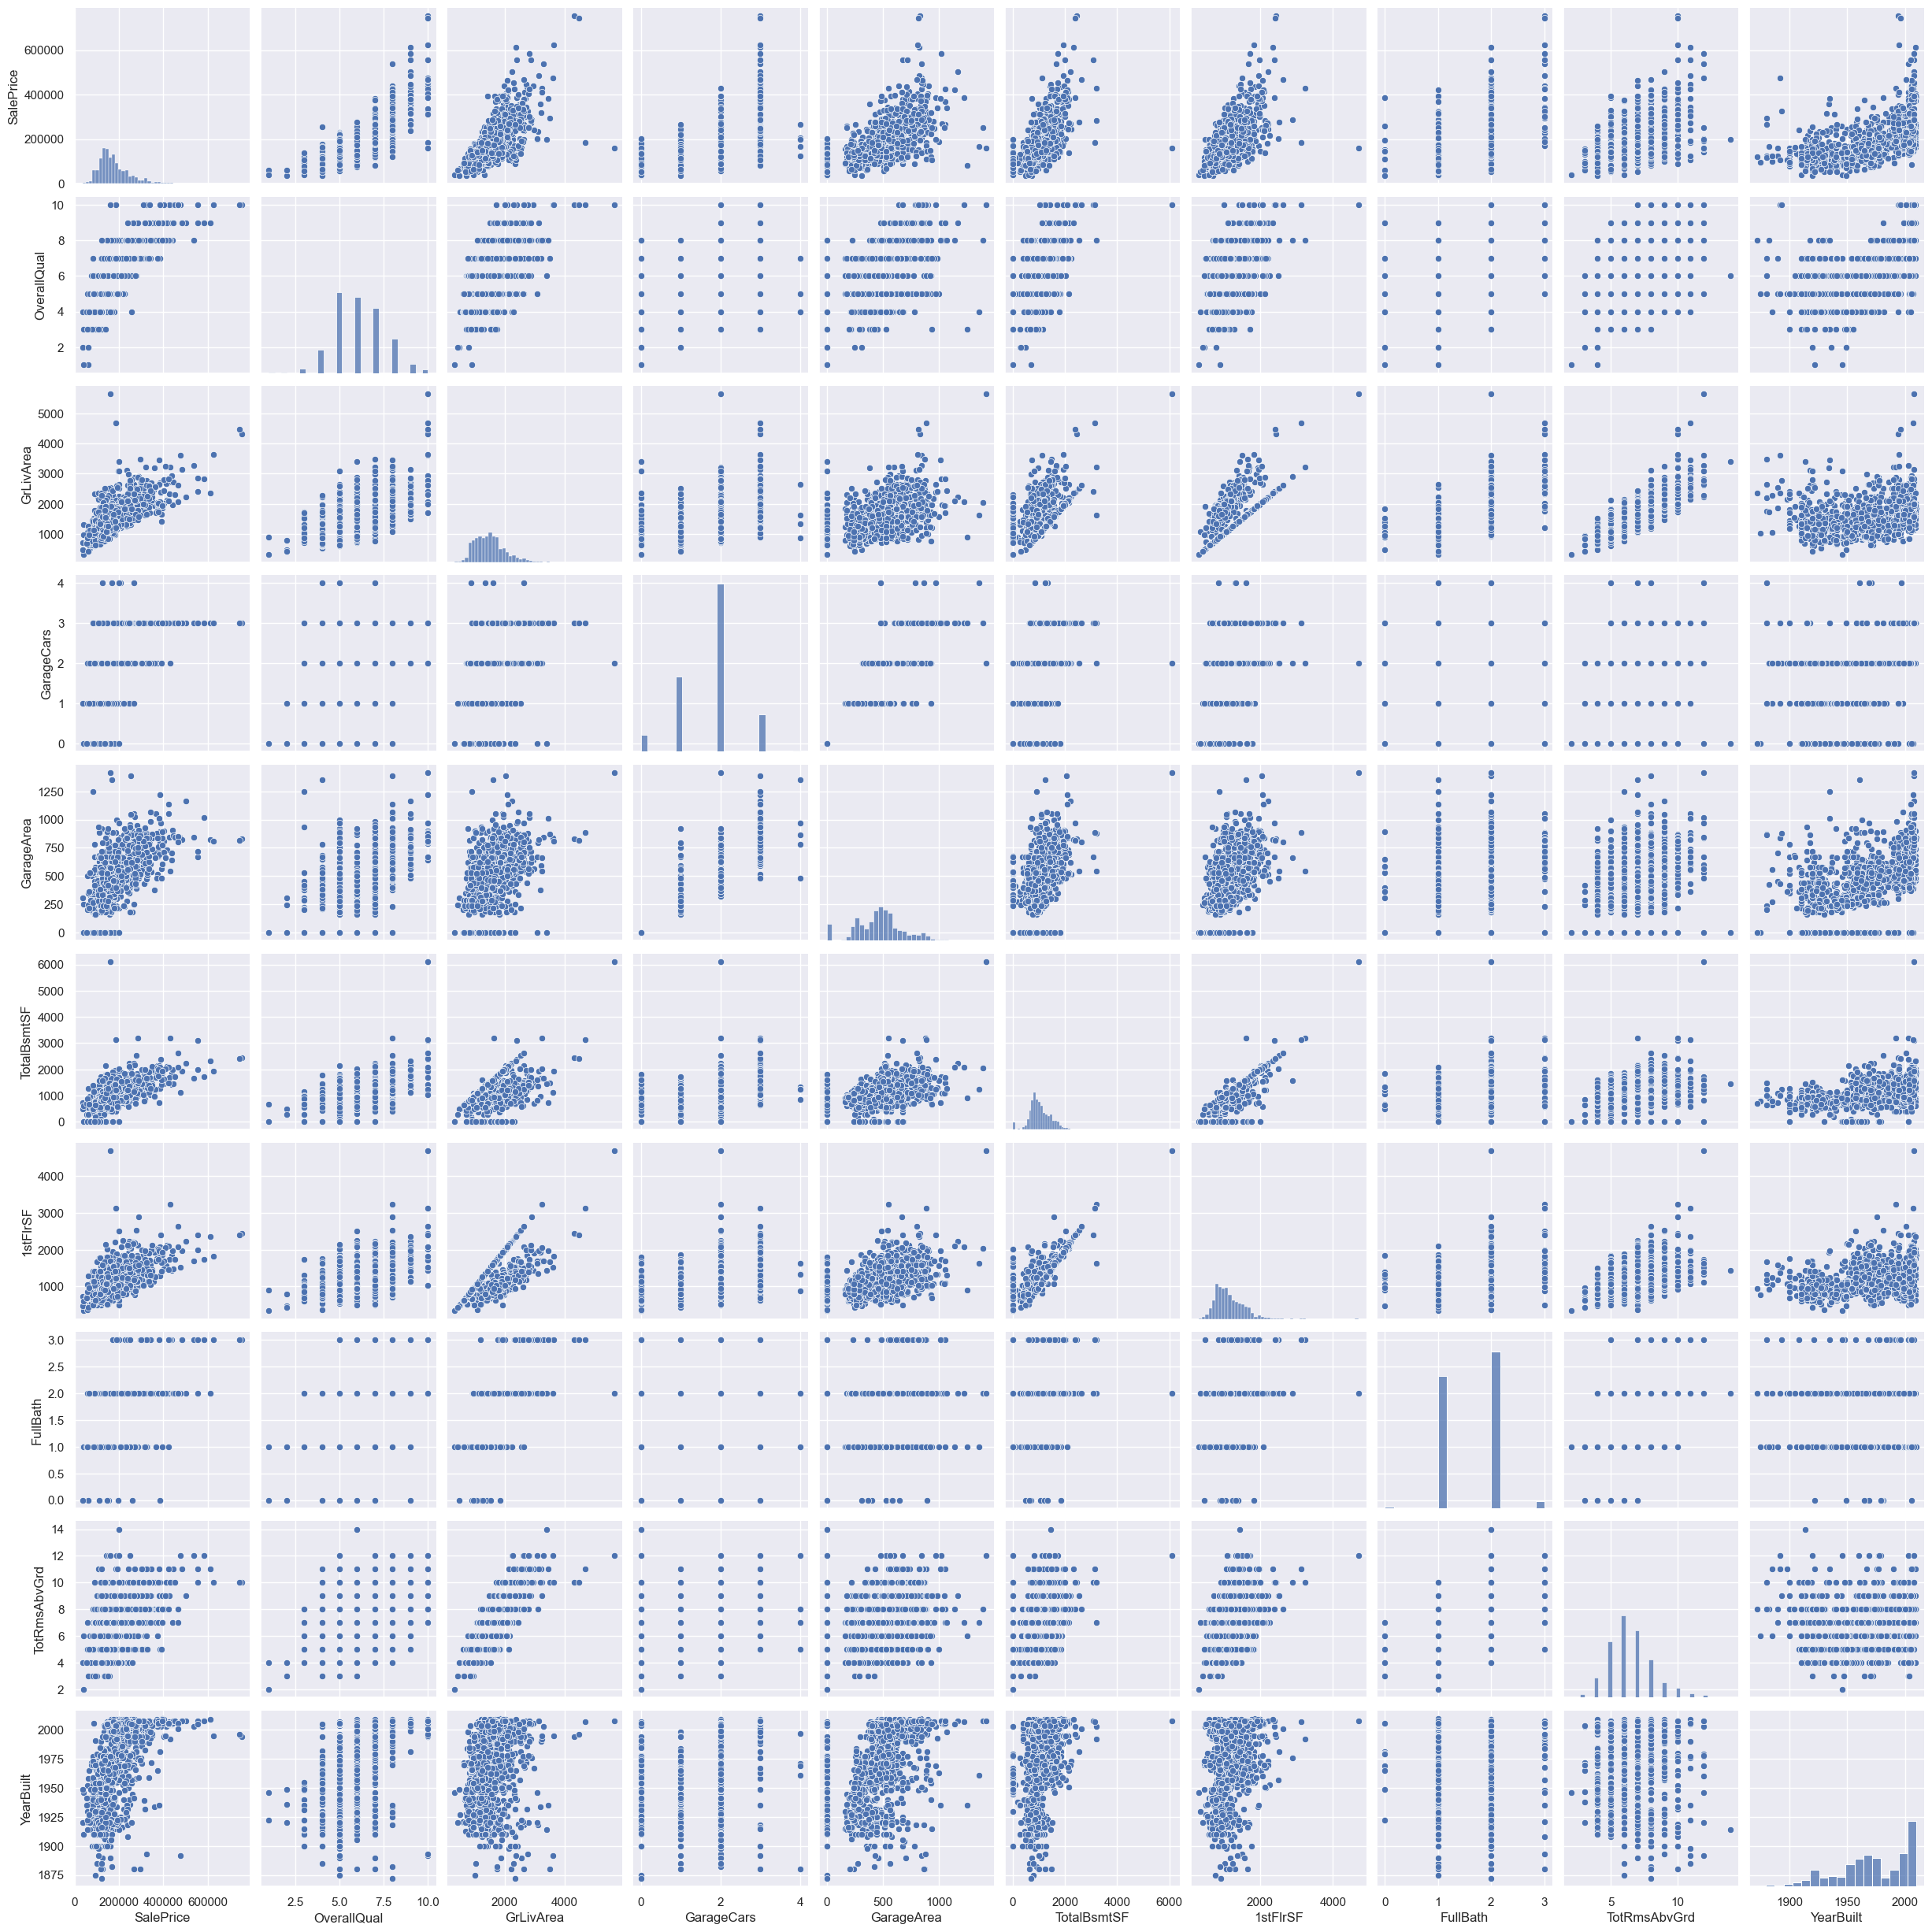

In [25]:
sns.set() #Usar configuración por defecro de seaborn

sns.pairplot(df[cols], height = 2.5)

plt.show()

Finalmente, para obtener una visión más representativa de esta correlación se grafica un mapa de calor con los coeficientes de correlación con las variables seleccionadas.

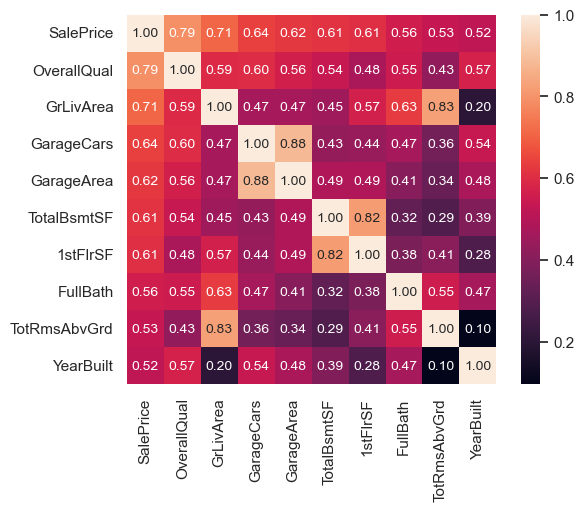

In [26]:
hm = sns.heatmap(df[cols].corr(), cbar = True, annot = True, square = True, fmt = '0.2f', 
                 annot_kws={'size':10,}, yticklabels=cols.values, xticklabels=cols.values) #Con annot = True mostramos los coeficientes
plt.show()

Esta validación de correlaciones nos permite pasar a un análisis predictivo de las variables.

## 4. Análisis Predictivo ⏩


Para comprobar la hipótesis inicial se implementó un modelo de regresión lineal utilizando la librería statsmodels y la función regression.linear_model. Se procedió entonces a considerar variables de la lista de las 10 más correlacionadas para encontrar el modelo que se mejor se ajuste a los datos.

El critero para seleccionar el modelo definitivo será el coeficiente $R^2$

Si bien el tamaño del lote no hacía parte de las variables más correlacionadas, se modela con el fin de validar la hipótesis.

In [27]:
modelo_1 = smf.ols(formula = 'SalePrice ~ LotArea', data = df).fit()

modelo_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     109.1
Date:                Sat, 24 Feb 2024   Prob (F-statistic):           1.12e-24
Time:                        08:01:05   Log-Likelihood:                -18491.
No. Observations:                1460   AIC:                         3.699e+04
Df Residuals:                    1458   BIC:                         3.700e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.588e+05   2914.717     54.495      0.000    1.53e+05    1.65e+05
LotArea        2.1000      0.201     10.445      0.000       1.706       2.494
==============================================================================
Omnibus:                      587.660   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3374.003
Skew:                           1.788   Prob(JB):                         0.00
Kurtosis:                       9.532   Cond. No.                     2.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
#Se valida el comportamiento del modelo tomando como variable dependiente el precio y 
#como variuable independiente el tamaño del Garage

modelo_2 = smf.ols(formula = 'SalePrice ~ GarageArea', data = df).fit()

modelo_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     927.0
Date:                Sat, 24 Feb 2024   Prob (F-statistic):          5.27e-158
Time:                        08:01:05   Log-Likelihood:                -18185.
No. Observations:                1460   AIC:                         3.637e+04
Df Residuals:                    1458   BIC:                         3.638e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.136e+04   3949.003     18.070      0.000    6.36e+04    7.91e+04
GarageArea   231.6456      7.608     30.446      0.000     216.721     246.570
==============================================================================
Omnibus:                      562.790   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5197.079
Skew:                           1.533   Prob(JB):                         0.00
Kurtosis:                      11.720   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
#Se valida el comportamiento del modelo tomando como variable dependiente el precio y 
#como variuable independiente el tamaño del sótano

modelo_3 = smf.ols(formula = 'SalePrice ~ TotalBsmtSF', data = df).fit()

modelo_3.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     880.3
Date:                Sat, 24 Feb 2024   Prob (F-statistic):          9.48e-152
Time:                        08:01:05   Log-Likelihood:                -18199.
No. Observations:                1460   AIC:                         3.640e+04
Df Residuals:                    1458   BIC:                         3.641e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.343e+04   4286.892     14.796      0.000     5.5e+04    7.18e+04
TotalBsmtSF   111.1096      3.745     29.671      0.000     103.764     118.455
==============================================================================
Omnibus:                      386.381   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5810.518
Skew:                           0.809   Prob(JB):                         0.00
Kurtosis:                      12.638   Cond. No.                     2.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
#Se valida el comportamiento del modelo tomando como variable dependiente el precio y 
#como variuable independiente el área de la casa

modelo_4 = smf.ols(formula = 'SalePrice ~ GrLivArea', data = df).fit()

modelo_4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Sat, 24 Feb 2024   Prob (F-statistic):          4.52e-223
Time:                        08:01:05   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.857e+04   4480.755      4.144      0.000    9779.612    2.74e+04
GrLivArea    107.1304      2.794     38.348      0.000     101.650     112.610
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
#Finalmente, se valida el comportamiento del modelo tomando como variable dependiente el precio y 
#como variuables independientes el área de la casa, la calidad general y el año de construcción

modelo_5 = smf.ols(formula = 'SalePrice ~ GrLivArea + C(OverallQual) + YearBuilt', data = df).fit()

modelo_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     483.5
Date:                Sat, 24 Feb 2024   Prob (F-statistic):               0.00
Time:                        08:01:05   Log-Likelihood:                -17419.
No. Observations:                1460   AIC:                         3.486e+04
Df Residuals:                    1448   BIC:                         3.492e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.034e+06   8.31e+04    -12.451      0.000    -1.2e+06   -8.71e+05
C(OverallQual)[T.2]   3816.2604   3.37e+04      0.113      0.910   -6.22e+04    6.99e+04
C(OverallQual)[T.3]   8475.3281   2.74e+04      0.310      0.757   -4.52e+04    6.22e+04
C(OverallQual)[T.4]   2.172e+04   2.63e+04      0.824      0.410      -3e+04    7.34e+04
C(OverallQual)[T.5]   3.481e+04   2.62e+04      1.328      0.184   -1.66e+04    8.62e+04
C(OverallQual)[T.6]   4.319e+04   2.63e+04      1.643      0.101   -8379.746    9.48e+04
C(OverallQual)[T.7]   6.406e+04   2.64e+04      2.424      0.015    1.22e+04    1.16e+05
C(OverallQual)[T.8]    1.12e+05   2.66e+04      4.210      0.000    5.98e+04    1.64e+05
C(OverallQual)[T.9]   1.927e+05   2.71e+04      7.099      0.000    1.39e+05    2.46e+05
C(OverallQual)[T.10]  2.163e+05   2.83e+04      7.652      0.000    1.61e+05    2.72e+05
GrLivArea               59.0878      2.377     24.856      0.000      54.425      63.751
YearBuilt              541.8085     40.618     13.339      0.000     462.133     621.484
==============================================================================
Omnibus:                      529.646   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38345.790
Skew:                          -0.797   Prob(JB):                         0.00
Kurtosis:                      28.056   Cond. No.                     2.35e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Una vez definidos y ajustados los modelos, se procede a crear un dataframe con el precio real y los precios pronosticados por los modelos.

In [32]:
resultados_modelos = pd.DataFrame(
    dict(
        valor_actual = df.SalePrice,
        pronostico_modelo_1 = modelo_1.predict(),
        pronostico_modelo_2 = modelo_2.predict(),
        pronostico_modelo_3 = modelo_3.predict(),
        pronostico_modelo_4 = modelo_4.predict(),
        pronostico_modelo_5 = modelo_5.predict(),
    )
)

resultados_modelos.head()


,valor_actual,pronostico_modelo_1,pronostico_modelo_2,pronostico_modelo_3,pronostico_modelo_4,pronostico_modelo_5
0,208500,176580.914889,198299.218159,158540.449302,201761.939688,216061.827689
1,181500,178995.882633,177914.404082,203650.948399,153767.538871,154088.034552
2,223500,182460.836354,212197.955029,165651.463938,209903.846969,219468.884924
3,140000,178890.884036,220073.905923,147429.488933,202511.852201,168796.291620
4,250000,188781.751928,265013.155137,190651.124767,254041.554863,291252.529121


Con el fin de analizar los resultados de una forma más sencilla, se procede a graficar la función de distribución empírica.

<Axes: ylabel='Proportion'>

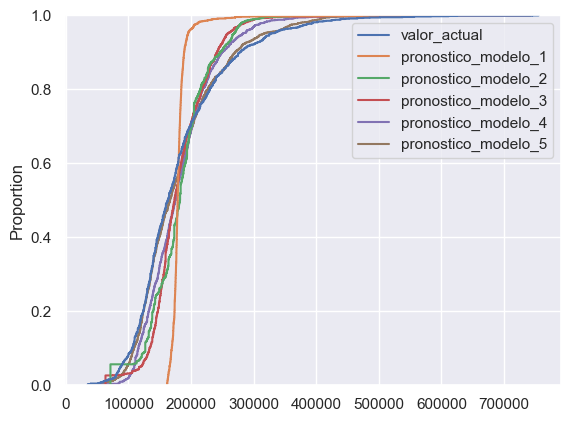

In [33]:
sns.ecdfplot(data = resultados_modelos)

De este gráfico se puede observar que hay un modelo que se comporta mejor que los demá: el Modelo 5. Esto no es sorpresivo, pues fue el modelo con mejor coeficiente de $R^2$.

Se procede a filtar el modelo y a graficarlo nuevamente.

In [34]:
mejor_modelo = resultados_modelos[['valor_actual', 'pronostico_modelo_5']]

<Axes: ylabel='Proportion'>

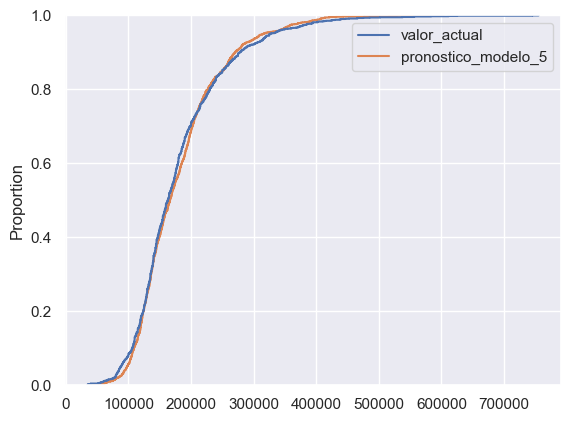

In [35]:
sns.ecdfplot(data = mejor_modelo)

Finalmente, podemos observar un comportamiento positivo en el modelo de regresión lineal simple seleccionado, lo que da pie a las siguientes conclusiones.

## 5. Conclusiones

* El tamaño del lote no es tan relevante a la hora de definir el precio de una casa en Estados Unidos, esto puede tener varias explicaciones pero optamos por las siguientes: Las personas no suelen comprar pensando en ampliar la construcción del inmueble o  las casas con lotes significativamente grandes se encuentra ubicadas en zonas rurales o alejadas y, por ende, no son tan comerciales.

* Las variables que mejor expican el precio de las casas son el tamaño del área del interior, la calidad general y el año de construcción.